In [1]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
h_1M = mr.MesaData('mesa_data/1M_pre_ms_to_wd/LOGS/history.data')

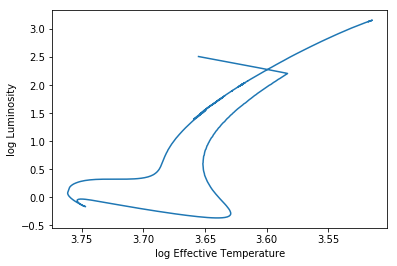

In [4]:
plt.plot(h_1M.log_Teff,h_1M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()

In [5]:
h_15M = mr.MesaData('mesa_data/15M_at_TAMS/LOGS/history.data')

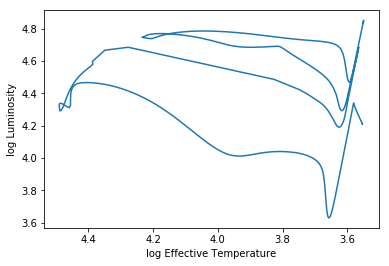

In [6]:
plt.plot(h_15M.log_Teff,h_15M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()

[HYG Database](http://www.astronexus.com/hyg)
contains all ~120,000 stars that are either:  

- brighter than a certain magnitude cutoff (magnitude +7.5 to +9.0) or 
- within 50 parsecs (about 160 light years) from the Sun.""


In [1]:
import pandas as pd
df = pd.read_csv('http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz')
# df=df.sample(5000)

HYG dataset reports flux ratio 'color index' $B-V$; can be transformed to temperature using:
$${\displaystyle T=4600\,\mathrm {K} \left({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\right).}$$
(Ballesteros 2012)

In [2]:
df.loc[:,'temp'] = 4600 * (1 / (0.92 * df.ci + 1.7) + 1 / (0.92 * df.ci + 0.62))

In [3]:
import altair as alt; 
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

star_chart = alt.Chart(df).mark_circle(size=1).encode(
    x=alt.X('temp', 
            axis=alt.Axis(title='Temperature (K)')),
    y=alt.Y('lum', 
            axis=alt.Axis(title=r'Luminosity (L☉)'),
            scale=alt.Scale(type='log')),
    color=alt.Color('temp', scale=alt.Scale(range=['red','blue'])))

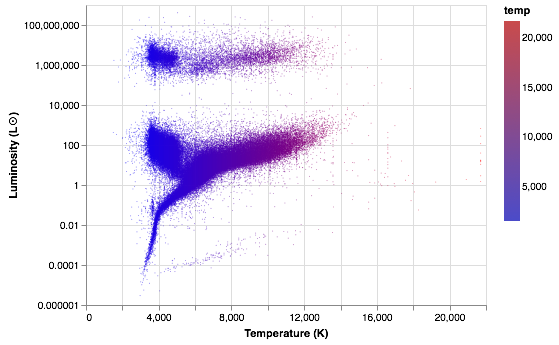

In [4]:
star_chart

In [66]:
df.loc[:,'spectral_type'] = df.spect.str.slice(0,1)
# df.spectral_type.drop_duplicates()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


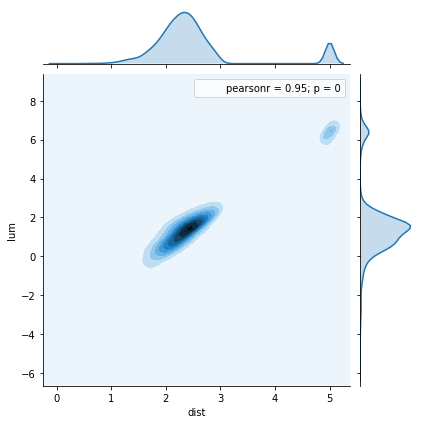

In [55]:
data = np.log10(df.loc[:,['dist', 'lum']]).replace(
     [np.inf, -np.inf], np.nan).dropna()
sns.jointplot(data=data, x='dist', y='lum', kind='kde')
plt.show()

In [53]:
np.log10(df.loc[:,['dist', 'lum']]).replace(
     [np.inf, -np.inf], np.nan).dropna().max()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


dist    5.000
lum     8.612
dtype: float64